<a href="https://colab.research.google.com/github/Surya23-Git/Web_Scrapping/blob/main/WebScrapping_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests
from bs4 import BeautifulSoup

In [2]:
for i in range(1,5):
  url = f"https://www.fifaindex.com/?page={i}"
  print(url)

https://www.fifaindex.com/?page=1
https://www.fifaindex.com/?page=2
https://www.fifaindex.com/?page=3
https://www.fifaindex.com/?page=4


In [3]:
df = pd.DataFrame()
# all_data = []
# Image_link = []
# Player_Name = []
# Player_Age = []
# Player_OVR = []
# Player_POT = []
# Player_Team = []
# Player_Position = []
# Player_Country = []
all_data, Image_link, Player_Name, Player_Age, Player_OVR, Player_POT, Player_Team, Player_Position, Player_Country, Pos_list= ([] for i in range(10))
for i in range(1,5):
  req = requests.get(f"https://www.fifaindex.com/?page={i}")
  soup = BeautifulSoup(req.content)
  soup.prettify()
  arr = [j for j in soup.findAll('tr')]
  del arr[0]
  
  for k in range(0,len(arr)):
    Image_link.append(re.sub('.*="|".*', '', str(arr[k].findAll('a', {'class':'link-player'})[0])))
    Player_Name.append(re.sub('.*title="| FIFA.*', '', str(arr[k].findAll('a', {'class':'link-player'})[0])))
    Player_Country.append(re.sub('.*title="|".*', '', str(arr[k].findAll('a', {'class':'link-nation'})[0])))
    Player_Age.append(re.sub('.*">|<.*', '', str(re.search('<td data-title="Age">(\d+)</td>',str(arr[k])))))
    Player_OVR.append(re.sub('.*r3">|.*r1">|.*r2">|<.*', '', str(arr[k])))
    Player_POT.append(re.sub('.*r3">|.*r1">|.*r2">|<.*', '', str(arr[k])))
    Player_Team.append(re.sub('.*title="| FIFA.*', '', str(arr[k].findAll('a', {'class':'link-team'})[0])))
    Pos_list = []
    for m in range(len(arr[k].findAll('a', {'class':'link-position'}))):
      Pos_list.append(re.sub('.*title="|".*', '', str(arr[k].findAll('a', {'class':'link-position'})[m])))
    Player_Position.append(Pos_list)
    #Player_Position.append(re.sub('.*title="|".*', '', str(arr[k].findAll('a', {'class':'link-position'})[0])))
  data = pd.DataFrame({
        'Name': Player_Name,
        'Age': Player_Age,
        'Country': Player_Country,
        'OVR': Player_OVR,
        'POT': Player_POT,
        'Team': Player_Team,
        'Position': Player_Position,
        'Image_link': Image_link
        
    })
  
all_data.append(data)

In [4]:
Players_df = df.append(all_data, ignore_index=True)
Players_df["Name"] = Players_df["Name"].str.strip()
Players_df["Team"] = Players_df["Team"].str.strip()
#Players_df["Position"] = Players_df["Position"].str.strip()
Players_df["Image_link"] = Players_df["Image_link"].str.strip()
Players_df

,Name,Age,Country,OVR,POT,Team,Position,Image_link
0,Marcel Sabitzer,28,Austria,80,80,Bayern München,"[CM, CDM, CAM]",https://fifastatic.fifaindex.com/FIFA23/player...
1,Enzo Fernández,21,Argentina,87,87,Benfica,"[CM, CDM]",https://fifastatic.fifaindex.com/FIFA23/player...
2,Mykhailo Mudryk,22,Ukraine,84,84,Shakhtar Donetsk,"[LM, CAM]",https://fifastatic.fifaindex.com/FIFA23/player...
3,Jorginho,31,Italy,85,85,Chelsea,[CM],https://fifastatic.fifaindex.com/FIFA23/player...
4,Vitinha,22,Portugal,89,89,Paris Saint-Germain,"[CM, CAM]",https://fifastatic.fifaindex.com/FIFA23/player...
...,...,...,...,...,...,...,...,...
95,William Saliba,21,France,87,87,Arsenal,[CB],https://fifastatic.fifaindex.com/FIFA23/player...
96,Jurriën Timber,21,Netherlands,88,88,Ajax,"[CB, RB]",https://fifastatic.fifaindex.com/FIFA23/player...
97,Luca Pellegrini,23,Italy,82,82,Juventus,[LB],https://fifastatic.fifaindex.com/FIFA23/player...
98,Richarlison,25,Brazil,84,84,Tottenham Hotspur,"[ST, LW]",https://fifastatic.fifaindex.com/FIFA23/player...


In [5]:
Players_df.Age = Players_df.Age.astype(int)
Players_df.OVR = Players_df.OVR.astype(int)
Players_df.POT = Players_df.POT.astype(int)

In [6]:
Players_df.to_csv("Players_Refined.csv")

In [7]:
Players_df.isna().sum()

Name          0
Age           0
Country       0
OVR           0
POT           0
Team          0
Position      0
Image_link    0
dtype: int64

In [8]:
Players_df.columns

Index(['Name', 'Age', 'Country', 'OVR', 'POT', 'Team', 'Position',
       'Image_link'],
      dtype='object')

In [9]:
Players_df[["OVR", "POT", "Age"]].describe()

,OVR,POT,Age
count,100.000000,100.000000,100.00000
mean,83.980000,83.980000,23.87000
std,5.214548,5.214548,4.29859
min,68.000000,68.000000,19.00000
25%,80.000000,80.000000,21.00000
50%,85.000000,85.000000,22.00000
75%,88.000000,88.000000,26.00000
max,95.000000,95.000000,41.00000


In [10]:
Players_df[Players_df["Name"] == "Erling Haaland"]

,Name,Age,Country,OVR,POT,Team,Position,Image_link
9,Erling Haaland,22,Norway,94,94,Manchester City,[ST],https://fifastatic.fifaindex.com/FIFA23/player...


In [11]:
Players_df.sort_values(by=["Age", "OVR"])

,Name,Age,Country,OVR,POT,Team,Position,Image_link
12,Emre Demir,19,Turkey,79,79,FC Barcelona,"[CAM, RW, LW]",https://fifastatic.fifaindex.com/FIFA23/player...
87,Rasmus Højlund,19,Denmark,79,79,Sturm Graz,[ST],https://fifastatic.fifaindex.com/FIFA23/player...
34,Malo Gusto,19,France,85,85,Olympique Lyonnais,[RB],https://fifastatic.fifaindex.com/FIFA23/player...
31,Xavi Simons,19,Netherlands,86,86,PSV,"[CAM, CM, RW]",https://fifastatic.fifaindex.com/FIFA23/player...
54,Carney Chukwuemeka,19,England,86,86,Chelsea,"[CM, CAM, CF]",https://fifastatic.fifaindex.com/FIFA23/player...
...,...,...,...,...,...,...,...,...
3,Jorginho,31,Italy,85,85,Chelsea,[CM],https://fifastatic.fifaindex.com/FIFA23/player...
89,Salomón Rondón,33,Venezuela,74,74,Everton,[ST],https://fifastatic.fifaindex.com/FIFA23/player...
82,Luis Suárez,35,Uruguay,84,84,Nacional de Montevideo,[ST],https://fifastatic.fifaindex.com/FIFA23/player...
10,Cristiano Ronaldo,37,Portugal,90,90,Manchester United,[ST],https://fifastatic.fifaindex.com/FIFA23/player...


In [12]:
Players_df.sort_values(by=["Age", "OVR"], ascending = [True, True]).head()

,Name,Age,Country,OVR,POT,Team,Position,Image_link
12,Emre Demir,19,Turkey,79,79,FC Barcelona,"[CAM, RW, LW]",https://fifastatic.fifaindex.com/FIFA23/player...
87,Rasmus Højlund,19,Denmark,79,79,Sturm Graz,[ST],https://fifastatic.fifaindex.com/FIFA23/player...
34,Malo Gusto,19,France,85,85,Olympique Lyonnais,[RB],https://fifastatic.fifaindex.com/FIFA23/player...
31,Xavi Simons,19,Netherlands,86,86,PSV,"[CAM, CM, RW]",https://fifastatic.fifaindex.com/FIFA23/player...
54,Carney Chukwuemeka,19,England,86,86,Chelsea,"[CM, CAM, CF]",https://fifastatic.fifaindex.com/FIFA23/player...


In [13]:
Players_df.sort_values(by=["Age", "OVR"], ascending = [False, True]).head()

,Name,Age,Country,OVR,POT,Team,Position,Image_link
79,Zlatan Ibrahimović,41,Sweden,82,82,Milan,[ST],https://fifastatic.fifaindex.com/FIFA23/player...
10,Cristiano Ronaldo,37,Portugal,90,90,Manchester United,[ST],https://fifastatic.fifaindex.com/FIFA23/player...
82,Luis Suárez,35,Uruguay,84,84,Nacional de Montevideo,[ST],https://fifastatic.fifaindex.com/FIFA23/player...
89,Salomón Rondón,33,Venezuela,74,74,Everton,[ST],https://fifastatic.fifaindex.com/FIFA23/player...
37,Fabio Borini,31,Italy,75,75,Fatih Karagümrük S.K.,"[LW, ST, RW]",https://fifastatic.fifaindex.com/FIFA23/player...


In [14]:
Players_df.sort_values(by=["OVR", "Age"], ascending = [False, True]).head()

,Name,Age,Country,OVR,POT,Team,Position,Image_link
15,Kylian Mbappé,24,France,95,95,Paris Saint-Germain,"[ST, LW]",https://fifastatic.fifaindex.com/FIFA23/player...
9,Erling Haaland,22,Norway,94,94,Manchester City,[ST],https://fifastatic.fifaindex.com/FIFA23/player...
22,Vinícius Jr.,22,Brazil,92,92,Real Madrid,[LW],https://fifastatic.fifaindex.com/FIFA23/player...
74,Phil Foden,22,England,92,92,Manchester City,"[LW, CF, CAM]",https://fifastatic.fifaindex.com/FIFA23/player...
56,Florian Wirtz,19,Germany,91,91,Bayer 04 Leverkusen,"[CAM, CM]",https://fifastatic.fifaindex.com/FIFA23/player...


In [15]:
# 10 Youngest Players in the dataset
Young = Players_df.sort_values(by=["Age"], ascending = [True]).head(10)["Name"]
Young

39          Rayan Cherki
87        Rasmus Højlund
23         Jamal Musiala
34            Malo Gusto
50        Harvey Elliott
12            Emre Demir
54    Carney Chukwuemeka
56         Florian Wirtz
31           Xavi Simons
42      Ryan Gravenberch
Name: Name, dtype: object

In [16]:
Players_df.sort_values(by=["Age"], ascending = [True]).head(10)

,Name,Age,Country,OVR,POT,Team,Position,Image_link
39,Rayan Cherki,19,France,88,88,Olympique Lyonnais,"[LW, ST, RW]",https://fifastatic.fifaindex.com/FIFA23/player...
87,Rasmus Højlund,19,Denmark,79,79,Sturm Graz,[ST],https://fifastatic.fifaindex.com/FIFA23/player...
23,Jamal Musiala,19,Germany,90,90,Bayern München,"[CM, LM, CAM]",https://fifastatic.fifaindex.com/FIFA23/player...
34,Malo Gusto,19,France,85,85,Olympique Lyonnais,[RB],https://fifastatic.fifaindex.com/FIFA23/player...
50,Harvey Elliott,19,England,87,87,Liverpool,"[CAM, CM, RW]",https://fifastatic.fifaindex.com/FIFA23/player...
12,Emre Demir,19,Turkey,79,79,FC Barcelona,"[CAM, RW, LW]",https://fifastatic.fifaindex.com/FIFA23/player...
54,Carney Chukwuemeka,19,England,86,86,Chelsea,"[CM, CAM, CF]",https://fifastatic.fifaindex.com/FIFA23/player...
56,Florian Wirtz,19,Germany,91,91,Bayer 04 Leverkusen,"[CAM, CM]",https://fifastatic.fifaindex.com/FIFA23/player...
31,Xavi Simons,19,Netherlands,86,86,PSV,"[CAM, CM, RW]",https://fifastatic.fifaindex.com/FIFA23/player...
42,Ryan Gravenberch,20,Netherlands,89,89,Bayern München,[CM],https://fifastatic.fifaindex.com/FIFA23/player...


In [17]:
# Top 5 Younger Players with highest OVR rating
OVR_Young = Players_df.sort_values(by=["OVR", "Age"], ascending = [False, True]).head()
OVR_Young

,Name,Age,Country,OVR,POT,Team,Position,Image_link
15,Kylian Mbappé,24,France,95,95,Paris Saint-Germain,"[ST, LW]",https://fifastatic.fifaindex.com/FIFA23/player...
9,Erling Haaland,22,Norway,94,94,Manchester City,[ST],https://fifastatic.fifaindex.com/FIFA23/player...
22,Vinícius Jr.,22,Brazil,92,92,Real Madrid,[LW],https://fifastatic.fifaindex.com/FIFA23/player...
74,Phil Foden,22,England,92,92,Manchester City,"[LW, CF, CAM]",https://fifastatic.fifaindex.com/FIFA23/player...
56,Florian Wirtz,19,Germany,91,91,Bayer 04 Leverkusen,"[CAM, CM]",https://fifastatic.fifaindex.com/FIFA23/player...


In [18]:
# Top 5 Younger Players with highest POT rating
POT_Young = Players_df.sort_values(by=["POT","Age"], ascending = [False, True]).head()
POT_Young

,Name,Age,Country,OVR,POT,Team,Position,Image_link
15,Kylian Mbappé,24,France,95,95,Paris Saint-Germain,"[ST, LW]",https://fifastatic.fifaindex.com/FIFA23/player...
9,Erling Haaland,22,Norway,94,94,Manchester City,[ST],https://fifastatic.fifaindex.com/FIFA23/player...
22,Vinícius Jr.,22,Brazil,92,92,Real Madrid,[LW],https://fifastatic.fifaindex.com/FIFA23/player...
74,Phil Foden,22,England,92,92,Manchester City,"[LW, CF, CAM]",https://fifastatic.fifaindex.com/FIFA23/player...
56,Florian Wirtz,19,Germany,91,91,Bayer 04 Leverkusen,"[CAM, CM]",https://fifastatic.fifaindex.com/FIFA23/player...


In [19]:
OVR_TOP = Players_df.sort_values(by=["OVR"], ascending = False).head()
OVR_TOP

,Name,Age,Country,OVR,POT,Team,Position,Image_link
15,Kylian Mbappé,24,France,95,95,Paris Saint-Germain,"[ST, LW]",https://fifastatic.fifaindex.com/FIFA23/player...
9,Erling Haaland,22,Norway,94,94,Manchester City,[ST],https://fifastatic.fifaindex.com/FIFA23/player...
74,Phil Foden,22,England,92,92,Manchester City,"[LW, CF, CAM]",https://fifastatic.fifaindex.com/FIFA23/player...
22,Vinícius Jr.,22,Brazil,92,92,Real Madrid,[LW],https://fifastatic.fifaindex.com/FIFA23/player...
56,Florian Wirtz,19,Germany,91,91,Bayer 04 Leverkusen,"[CAM, CM]",https://fifastatic.fifaindex.com/FIFA23/player...


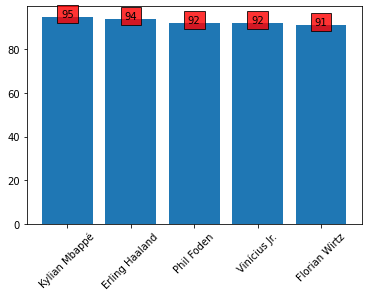

In [33]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y.iloc[i], y.iloc[i], ha = 'center',
                 Bbox = dict(facecolor = 'red', alpha =.8))

plt.bar(OVR_TOP["Name"], OVR_TOP["OVR"])
plt.xticks(range(len(OVR_TOP["OVR"])), OVR_TOP["Name"], rotation = 45)
addlabels(OVR_TOP["Name"], OVR_TOP["OVR"])

In [21]:
# Reading the saved csv file
df = pd.read_csv("/content/Players_Refined.csv")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  100 non-null    int64 
 1   Name        100 non-null    object
 2   Age         100 non-null    int64 
 3   Country     100 non-null    object
 4   OVR         100 non-null    int64 
 5   POT         100 non-null    int64 
 6   Team        100 non-null    object
 7   Position    100 non-null    object
 8   Image_link  100 non-null    object
dtypes: int64(4), object(5)
memory usage: 7.2+ KB


In [23]:
df.drop(['Unnamed: 0'], axis=1, inplace = True)

In [24]:
df

,Name,Age,Country,OVR,POT,Team,Position,Image_link
0,Marcel Sabitzer,28,Austria,80,80,Bayern München,"['CM', 'CDM', 'CAM']",https://fifastatic.fifaindex.com/FIFA23/player...
1,Enzo Fernández,21,Argentina,87,87,Benfica,"['CM', 'CDM']",https://fifastatic.fifaindex.com/FIFA23/player...
2,Mykhailo Mudryk,22,Ukraine,84,84,Shakhtar Donetsk,"['LM', 'CAM']",https://fifastatic.fifaindex.com/FIFA23/player...
3,Jorginho,31,Italy,85,85,Chelsea,['CM'],https://fifastatic.fifaindex.com/FIFA23/player...
4,Vitinha,22,Portugal,89,89,Paris Saint-Germain,"['CM', 'CAM']",https://fifastatic.fifaindex.com/FIFA23/player...
...,...,...,...,...,...,...,...,...
95,William Saliba,21,France,87,87,Arsenal,['CB'],https://fifastatic.fifaindex.com/FIFA23/player...
96,Jurriën Timber,21,Netherlands,88,88,Ajax,"['CB', 'RB']",https://fifastatic.fifaindex.com/FIFA23/player...
97,Luca Pellegrini,23,Italy,82,82,Juventus,['LB'],https://fifastatic.fifaindex.com/FIFA23/player...
98,Richarlison,25,Brazil,84,84,Tottenham Hotspur,"['ST', 'LW']",https://fifastatic.fifaindex.com/FIFA23/player...


In [25]:
df[df["Name"] == "Anthony Gordon"]

,Name,Age,Country,OVR,POT,Team,Position,Image_link
58,Anthony Gordon,21,England,84,84,Everton,"['LM', 'RM']",https://fifastatic.fifaindex.com/FIFA23/player...


In [26]:
df[df["Position"].str.contains("ST")]

,Name,Age,Country,OVR,POT,Team,Position,Image_link
9,Erling Haaland,22,Norway,94,94,Manchester City,['ST'],https://fifastatic.fifaindex.com/FIFA23/player...
10,Cristiano Ronaldo,37,Portugal,90,90,Manchester United,['ST'],https://fifastatic.fifaindex.com/FIFA23/player...
15,Kylian Mbappé,24,France,95,95,Paris Saint-Germain,"['ST', 'LW']",https://fifastatic.fifaindex.com/FIFA23/player...
17,Julián Álvarez,22,Argentina,86,86,Manchester City,"['ST', 'RW', 'LW']",https://fifastatic.fifaindex.com/FIFA23/player...
24,Karim Adeyemi,20,Germany,87,87,Borussia Dortmund,['ST'],https://fifastatic.fifaindex.com/FIFA23/player...
25,Alexis Vega,25,Mexico,83,83,NG - FA,"['LW', 'ST', 'LM']",https://fifastatic.fifaindex.com/FIFA23/player...
28,Musa Barrow,24,Gambia,83,83,Bologna,"['CF', 'ST', 'LW']",https://fifastatic.fifaindex.com/FIFA23/player...
29,Randal Kolo Muani,24,France,84,84,Eintracht Frankfurt,"['ST', 'RM']",https://fifastatic.fifaindex.com/FIFA23/player...
30,Victor Osimhen,24,Nigeria,89,89,Napoli,['ST'],https://fifastatic.fifaindex.com/FIFA23/player...
37,Fabio Borini,31,Italy,75,75,Fatih Karagümrük S.K.,"['LW', 'ST', 'RW']",https://fifastatic.fifaindex.com/FIFA23/player...
